In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df_1 = pd.read_csv('d0/clean_data.csv')

In [5]:
df_1

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [6]:
df_1.bathroom.isna().sum()

1217

In [7]:
df_1.bathroom

0       NaN
1       2.0
2       NaN
3       2.0
4       1.0
       ... 
2615    2.0
2616    2.0
2617    2.0
2618    2.0
2619    2.0
Name: bathroom, Length: 2620, dtype: float64

In [8]:
len(df_1.location.value_counts())

178

In [9]:
df_1.shape

(2620, 8)

In [10]:
loc = df_1['location'].value_counts(ascending=True)
location_stats_less_than_10 = loc[loc<=10]
location_stats_less_than_10

Washermanpet                   1
Sevvapet                       1
Kumananchavadi                 1
Periyapanicheri                1
Muttukadu                      1
                              ..
Keelkattalai                   9
Kattankulathur                 9
Ambattur INDUSTRIAL ESTATE    10
Urapakkam                     10
Thandalam                     10
Name: location, Length: 119, dtype: int64

In [11]:
df_1.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [12]:
df2 = df_1.drop(['status','builder','age'],axis='columns')
df2

,price,area,bhk,bathroom,location
0,37.49,872,2,NaN,Sembakkam
1,93.54,1346,3,2.0,Selaiyur
2,151.00,2225,3,NaN,Mogappair
3,49.00,1028,2,2.0,Ambattur
4,42.28,588,2,1.0,Pallavaram
...,...,...,...,...,...
2615,27.50,750,2,2.0,Veppampattu
2616,27.50,750,2,2.0,Veppampattu
2617,30.00,800,2,2.0,Veppampattu
2618,31.50,850,2,2.0,Veppampattu


In [13]:
df2.isnull().sum()

price          0
area           0
bhk            0
bathroom    1217
location       0
dtype: int64

In [14]:
df2['bathrooms'] = df2['bathroom'].fillna(df2['bathroom'].mean().round())
df2

,price,area,bhk,bathroom,location,bathrooms
0,37.49,872,2,NaN,Sembakkam,2.0
1,93.54,1346,3,2.0,Selaiyur,2.0
2,151.00,2225,3,NaN,Mogappair,2.0
3,49.00,1028,2,2.0,Ambattur,2.0
4,42.28,588,2,1.0,Pallavaram,1.0
...,...,...,...,...,...,...
2615,27.50,750,2,2.0,Veppampattu,2.0
2616,27.50,750,2,2.0,Veppampattu,2.0
2617,30.00,800,2,2.0,Veppampattu,2.0
2618,31.50,850,2,2.0,Veppampattu,2.0


In [15]:
df2.drop('bathroom',axis='columns',inplace=True)

In [16]:
df2.head()

,price,area,bhk,location,bathrooms
0,37.49,872,2,Sembakkam,2.0
1,93.54,1346,3,Selaiyur,2.0
2,151.00,2225,3,Mogappair,2.0
3,49.00,1028,2,Ambattur,2.0
4,42.28,588,2,Pallavaram,1.0


In [17]:
df2.bhk.value_counts()

2    1367
3     895
1     177
4     108
5      67
6       4
8       2
Name: bhk, dtype: int64

In [18]:
df2.area.value_counts().unique()

array([41, 35, 29, 28, 27, 23, 21, 19, 18, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [19]:
df2.loc[988]

price                   33.11
area                      883
bhk                         2
location     Thirumullaivoyal
bathrooms                 2.0
Name: 988, dtype: object

In [20]:
df3 = df2.copy()

In [21]:
df3['price_per_sqft'] = df3['price']*100000/df3['area']
df3.head()

,price,area,bhk,location,bathrooms,price_per_sqft
0,37.49,872,2,Sembakkam,2.0,4299.311927
1,93.54,1346,3,Selaiyur,2.0,6949.479941
2,151.00,2225,3,Mogappair,2.0,6786.516854
3,49.00,1028,2,Ambattur,2.0,4766.536965
4,42.28,588,2,Pallavaram,1.0,7190.476190


In [22]:
df3['price_per_sqft'].describe()

count     2620.000000
mean      6387.418466
std       3409.167048
min       1743.119266
25%       4600.000000
50%       5417.177914
75%       6645.812201
max      26086.956522
Name: price_per_sqft, dtype: float64

In [23]:
loc = df3['location'].value_counts(ascending=True)
location_stats_less_than_10 = loc[loc<=10]
location_stats_less_than_10

Washermanpet                   1
Sevvapet                       1
Kumananchavadi                 1
Periyapanicheri                1
Muttukadu                      1
                              ..
Keelkattalai                   9
Kattankulathur                 9
Ambattur INDUSTRIAL ESTATE    10
Urapakkam                     10
Thandalam                     10
Name: location, Length: 119, dtype: int64

In [24]:
len(df3.location.unique())

178

In [25]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

60

In [26]:
df3[df3.area/df3.bhk<300].head()

,price,area,bhk,location,bathrooms,price_per_sqft
4,42.28,588,2,Pallavaram,1.0,7190.476190
6,38.00,885,3,Thirumazhisai,2.0,4293.785311
43,42.28,588,2,Pallavaram,1.0,7190.476190
54,29.62,528,2,Pammal,2.0,5609.848485
206,35.34,594,2,Vengaivasal,2.0,5949.494949


In [27]:
df3[df3.area/df3.bhk<300].shape

(27, 6)

In [28]:
df3.shape

(2620, 6)

In [29]:
df4 = df3[~(df3.area/df3.bhk<300)]
df4.shape

(2593, 6)

In [30]:
df4.price_per_sqft.describe()

count     2593.000000
mean      6396.745568
std       3422.929203
min       1743.119266
25%       4606.060606
50%       5417.177914
75%       6640.625000
max      26086.956522
Name: price_per_sqft, dtype: float64

# Removing outliers
    
    Here the min and max price_per_sqft are removed to make it consistent.

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(2011, 6)

In [32]:
df5

,price,area,bhk,location,bathrooms,price_per_sqft
0,261.00,1548,3,Adyar,2.0,16860.465116
1,278.00,1652,3,Adyar,2.0,16828.087167
2,274.00,1627,3,Adyar,2.0,16840.811309
3,210.00,1381,3,Adyar,3.0,15206.372194
4,325.00,2411,4,Adyar,4.0,13479.883866
...,...,...,...,...,...,...
2006,85.00,1621,3,tambaram west,3.0,5243.676743
2007,66.08,1180,3,tambaram west,3.0,5600.000000
2008,57.12,1020,2,tambaram west,2.0,5600.000000
2009,52.08,930,2,tambaram west,2.0,5600.000000


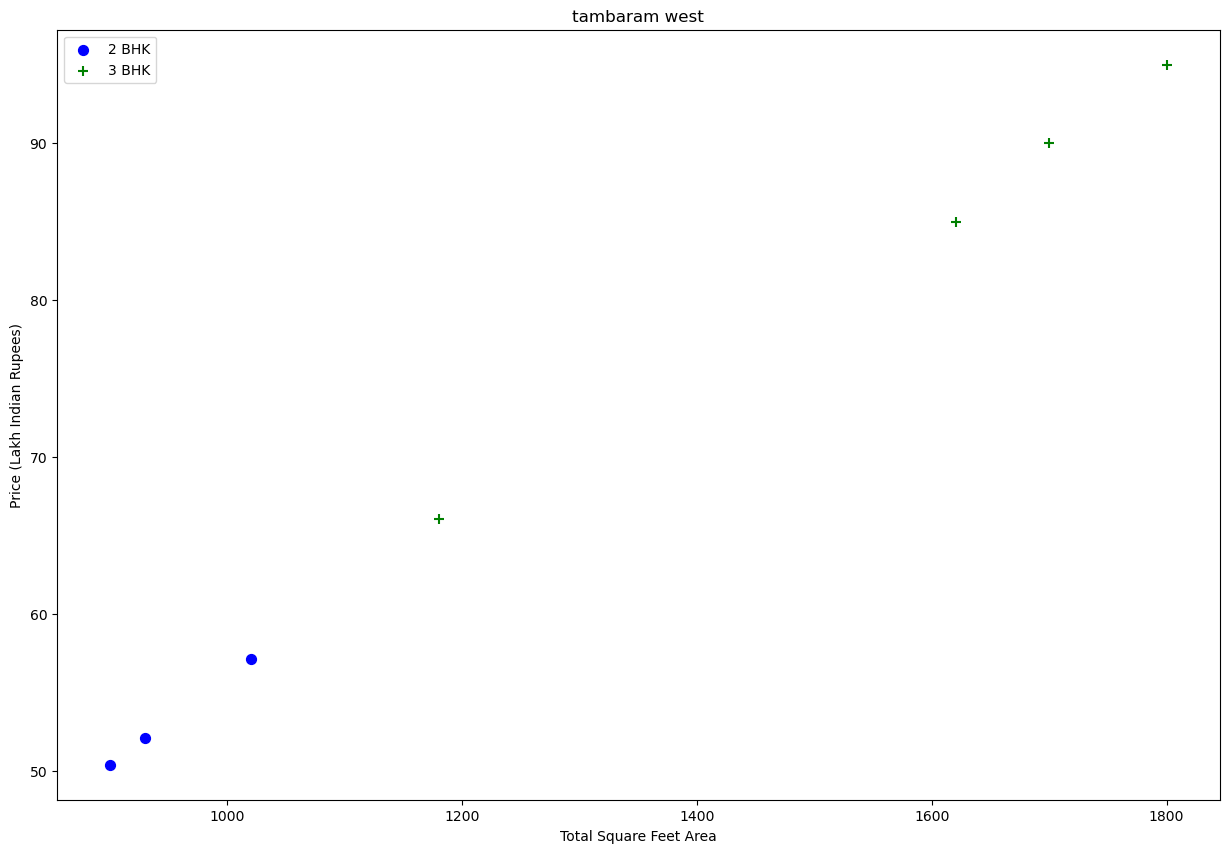

In [33]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"tambaram west")

In [34]:
df5.bathrooms.value_counts()

2.0    1557
3.0     296
1.0      95
5.0      44
4.0      19
Name: bathrooms, dtype: int64

In [35]:
df5.head()

,price,area,bhk,location,bathrooms,price_per_sqft
0,261.0,1548,3,Adyar,2.0,16860.465116
1,278.0,1652,3,Adyar,2.0,16828.087167
2,274.0,1627,3,Adyar,2.0,16840.811309
3,210.0,1381,3,Adyar,3.0,15206.372194
4,325.0,2411,4,Adyar,4.0,13479.883866


In [36]:
df6 = df5.drop(['price_per_sqft'],axis='columns')

In [37]:
df6

,price,area,bhk,location,bathrooms
0,261.00,1548,3,Adyar,2.0
1,278.00,1652,3,Adyar,2.0
2,274.00,1627,3,Adyar,2.0
3,210.00,1381,3,Adyar,3.0
4,325.00,2411,4,Adyar,4.0
...,...,...,...,...,...
2006,85.00,1621,3,tambaram west,3.0
2007,66.08,1180,3,tambaram west,3.0
2008,57.12,1020,2,tambaram west,2.0
2009,52.08,930,2,tambaram west,2.0


In [38]:
dummies = pd.get_dummies(df6.location)
dummies.head()

,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,East Tambaram,Gerugambakkam,Gowrivakkam,Guduvancheri,...,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,other,tambaram west
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df7 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7

,price,area,bhk,location,bathrooms,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,...,Thirumullaivoyal,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,tambaram west
0,261.00,1548,3,Adyar,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,278.00,1652,3,Adyar,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,274.00,1627,3,Adyar,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,210.00,1381,3,Adyar,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325.00,2411,4,Adyar,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,85.00,1621,3,tambaram west,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,66.08,1180,3,tambaram west,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2008,57.12,1020,2,tambaram west,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,52.08,930,2,tambaram west,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
X = df7.drop(['price','location'],axis='columns')

In [41]:
y = df7.price

In [42]:
X

,area,bhk,bathrooms,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,East Tambaram,...,Thirumullaivoyal,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,tambaram west
0,1548,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1652,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1627,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1381,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2411,4,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,1621,3,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,1180,3,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2008,1020,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,930,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()

In [45]:
linear.fit(X_train,y_train)

LinearRegression()

In [46]:
linear.score(X_test,y_test)

0.9557939905964135

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92541198, 0.93520035, 0.87581967, 0.93100902, 0.95871152])

In [50]:
cross_val_score(Lasso(),X,y,cv=cv)

array([0.80847715, 0.81938957, 0.79923218, 0.77926505, 0.82115712])

In [51]:
cross_val_score(Ridge(),X,y,cv=cv)

array([0.92529787, 0.92705918, 0.87962859, 0.93335966, 0.94980351])

# To Predict the price

In [60]:
def predict_price(location,area,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linear.predict([x])[0]

In [61]:
predict_price('Kolathur',1000, 2, 2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.06590793935815

In [62]:
predict_price('Alwarpet',1000, 2, 2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


406.3763892146977

In [63]:
predict_price('T Nagar',1000, 2, 2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


266.34705142245843

In [64]:
predict_price('Ambattur',1000, 2, 2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.72952491856948

In [72]:
predict_price('Velachery',1000,2,2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.03026921434075

In [65]:
df6.location.value_counts()

other               350
Veppampattu         112
Pammal              100
Sholinganallur       86
Madhavaram           78
Perungudi            69
Chromepet            67
Medavakkam           61
Kelambakkam          58
Selaiyur             50
Sembakkam            49
Perungalathur        48
Perumbakkam          46
West Mambalam        41
Thirumullaivoyal     37
Madipakkam           33
East Tambaram        32
Iyyappanthangal      30
Kolathur             30
Porur                29
Tiruvottiyur         29
Ambattur             27
Vanagaram            26
Pallavaram           26
Vadanemmeli          26
Kolapakkam           25
Karapakkam           24
Vadapalani           23
Royapettah           20
Padur                20
Nanmangalam          19
Mogappair            17
Anna Nagar           16
Madambakkam          16
Thaiyur              16
Koyambedu            16
Sithalapakkam        16
Ayanambakkam         15
Siruseri             15
Rajakilpakkam        15
Pozhichalur          15
Poonamallee     

In [73]:
import pickle
with open('chennai_home_prices_model.pickle','wb') as f:
    pickle.dump(linear,f)

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('column.json','w') as f:
    f.write(json.dumps(columns))